In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs
x,y = make_blobs(100,2,centers=2,cluster_std=1.5)

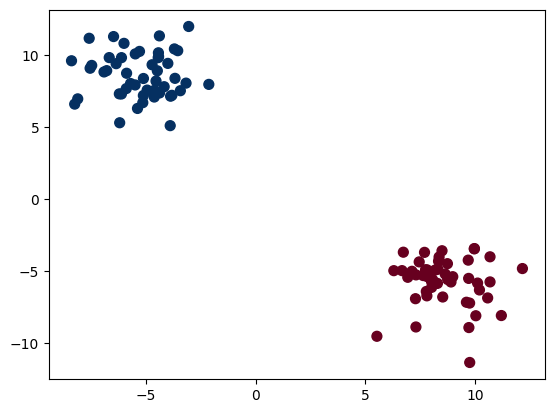

In [4]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='RdBu')

In [5]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x,y)

GaussianNB()

In [6]:
rng = np.random.RandomState(0)
x_new = [-6,-14] +[14+18]*rng.rand(1000,2)
y_new = model.predict(x_new)

(np.float64(-9.40392942601137),
 np.float64(13.179140995946607),
 np.float64(-12.484411290112458),
 np.float64(13.153991473902403))

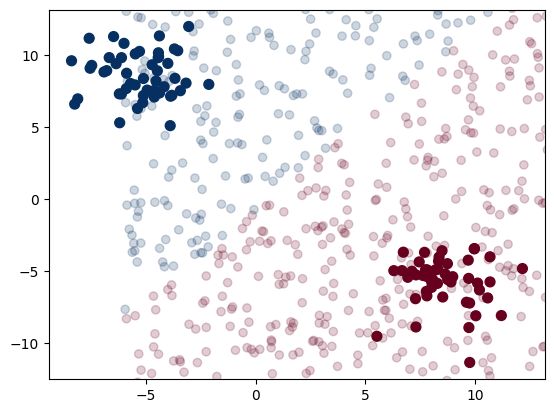

In [7]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='RdBu')
lim = plt.axis()
plt.scatter(x_new[:,0],x_new[:,1],c=y_new,cmap='RdBu',alpha=0.2)
plt.axis(lim)

## Çoklu Navie Bayes

In [9]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups

In [12]:
categories = ['talk.religion.misc','soc.religion.christian','sci.space','comp.graphics']

In [13]:
train = fetch_20newsgroups(subset='train',categories=categories)
test = fetch_20newsgroups(subset='test',categories=categories)

In [14]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [16]:
model = make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.data,train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [17]:
labels = model.predict(test.data)

In [18]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)

Text(113.92222222222219, 0.5, 'Estimated')

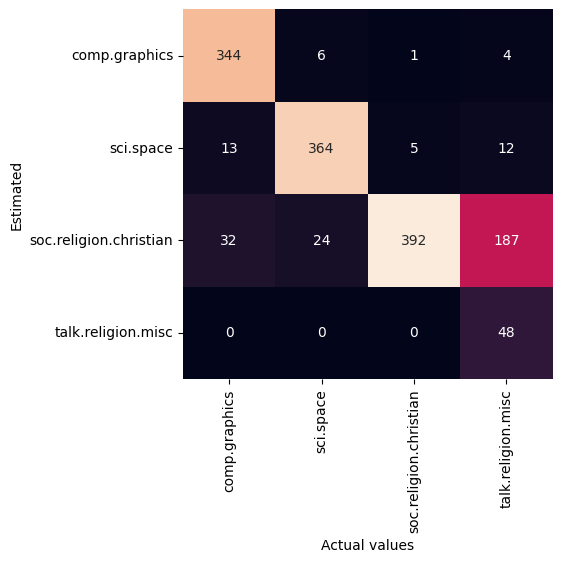

In [21]:
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel('Actual values')
plt.ylabel('Estimated')

In [25]:
def predict_category(s,train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]


In [26]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [27]:
predict_category('determining the screen resolution')

'comp.graphics'

## Ne zaman kullanılır? 

* tahmin etme ve hazırlanması çok hızlıdır. Çok basittir. 
* Model complexly az ise
* yüksek boyutlu veriler var ise
* kategoriler iyi ayarlanmış ise
* veriler arasındaki kolerasyon kat sayısı çok yüksek olursa, model doğruluğu düşebilir
* Kolerasyon düük olmalı ki, model ezber yapamasın.
* Basit veriler için uygundur. çok değişken var ise model karmaşık olur
